In [8]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import glob
import pickle as pkl
from scipy.stats import gaussian_kde, linregress

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
dic = pkl.load( open('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_t2mtosm_8km_savefile1.p', "rb"))#(open('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_t2mtosm_8km_savefile.p', "rb"))

In [4]:
dic

{'sm_anom': array([ 0.0000000e+00,  1.6345974e-23,  7.9061533e-25, ...,
        -2.7632266e-03, -1.0092184e-03,  0.0000000e+00], dtype=float32),
 't_anom': array([-0.07998657,  0.17773438, -0.02877808, ..., -0.7555237 ,
        -0.6749573 , -0.5546875 ], dtype=float32)}

In [30]:
def calc_density(v1,v2):

    xy = np.vstack([v1, v2])

    z = gaussian_kde(xy)(xy)

    return z / (z.max() - z.min())


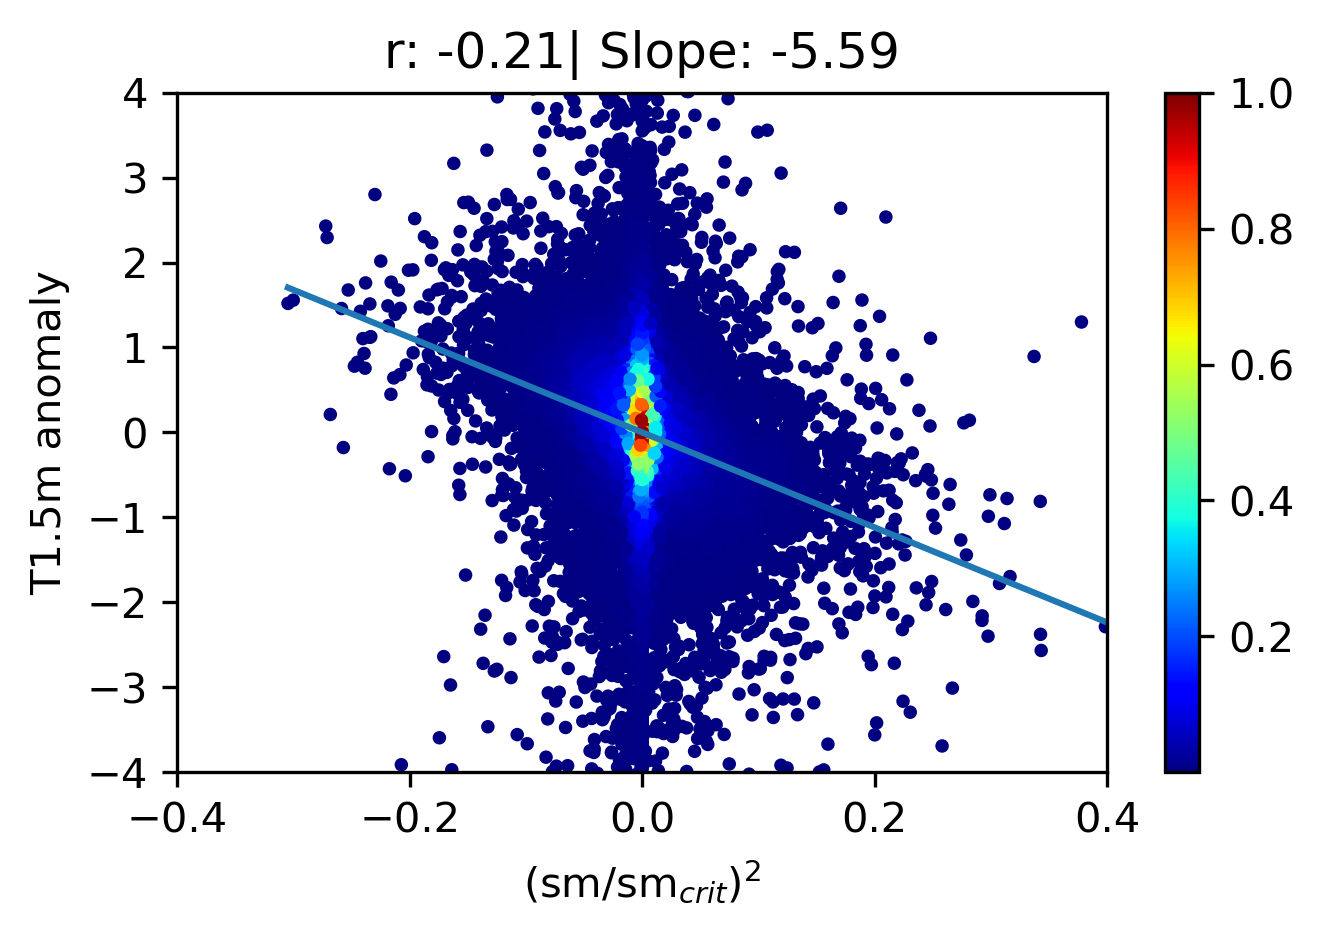

In [31]:
x = dic['sm_anom']
y = dic['t_anom']

slope, intercept, r, p, std_err = linregress(x, y)

density = calc_density(x,y)
f=plt.figure(figsize=(5,3),dpi=300)
ax = f.add_subplot(111)
plt.scatter(x,y, c=density, s=5, cmap='jet')
#plt.plot(intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.plot(np.linspace(np.min(x), np.max(x),10), intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.title('r: '+str(np.round(r,2))+'| Slope: '+str(np.round(slope,2)))
plt.xlabel(r'(sm/sm$_{crit}$)$^2$')
plt.ylabel('T1.5m anomaly')
ax.set_ylim(-4,4)
ax.set_xlim(-0.4,0.4)
plt.colorbar()
f.savefig('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_setlim_ratio_percentile.jpg')

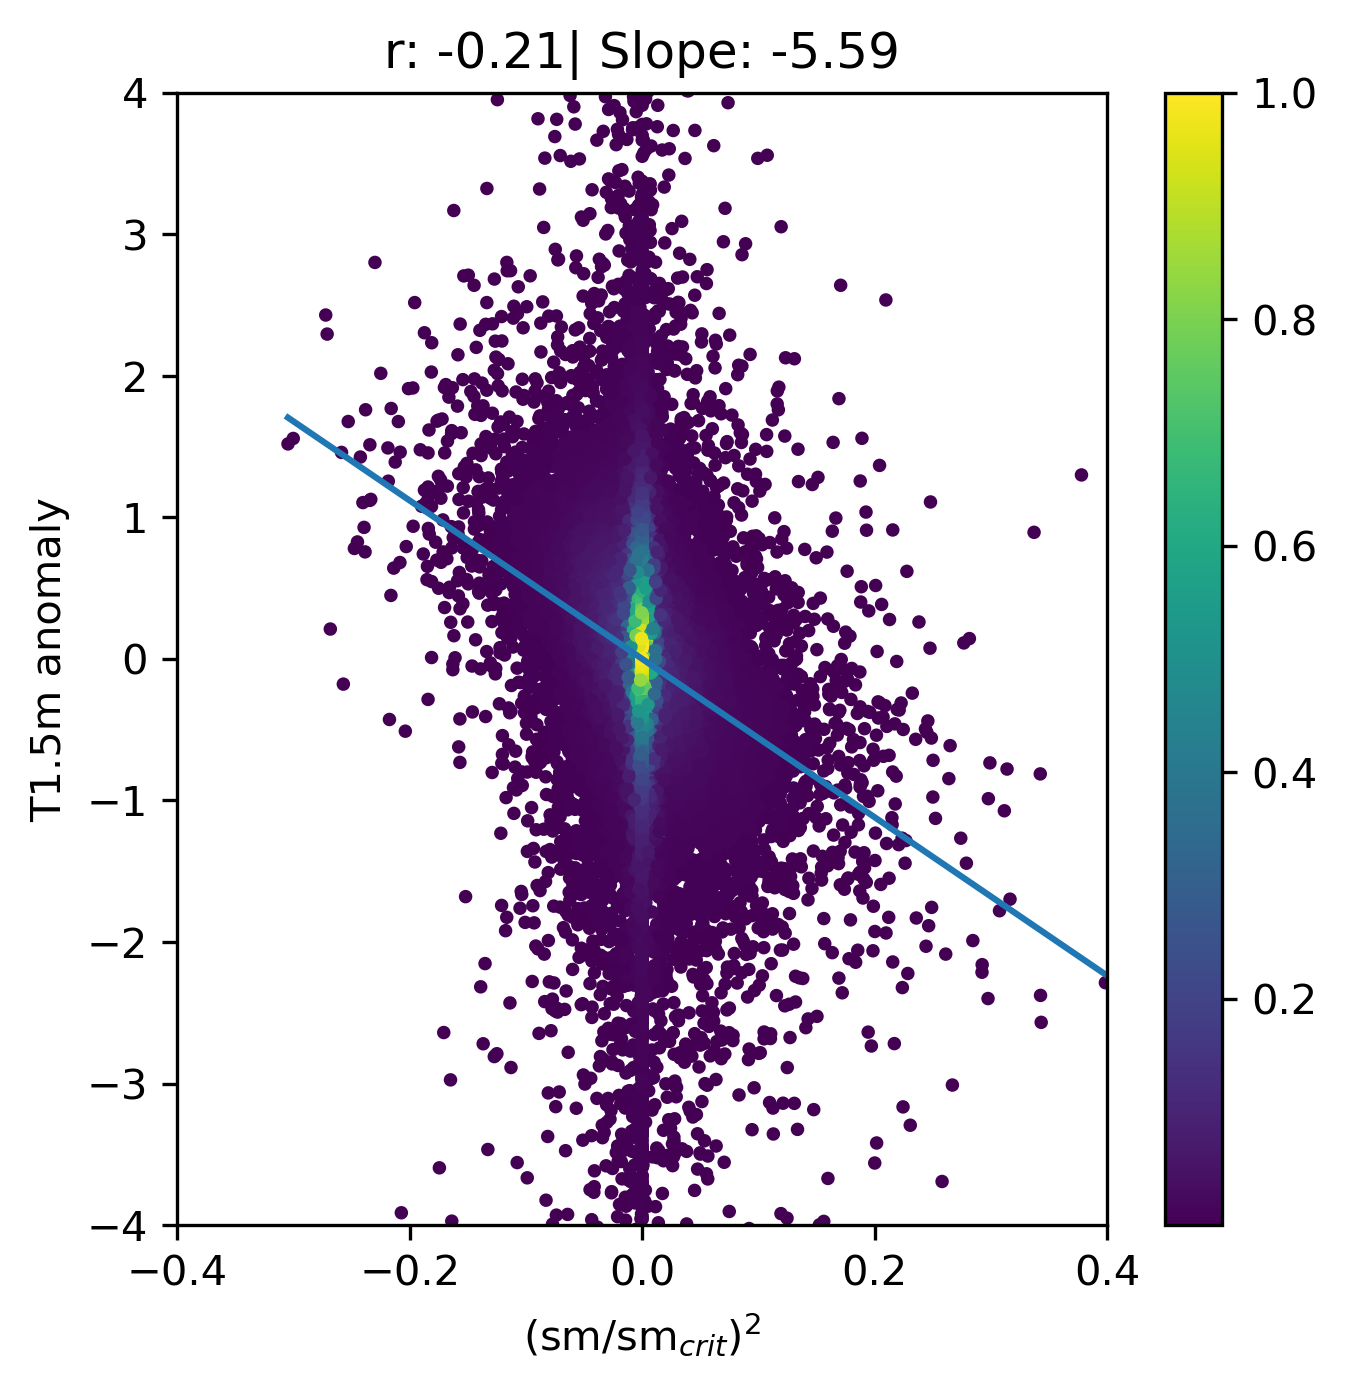

In [21]:
x = dic['sm_anom']
y = dic['t_anom']

slope, intercept, r, p, std_err = linregress(x, y)

density = calc_density(x,y)
f=plt.figure(figsize=(5,5),dpi=300)
ax = f.add_subplot(111)
plt.scatter(x,y, c=density, s=5)
#plt.plot(intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.plot(np.linspace(np.min(x), np.max(x),10), intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.title('r: '+str(np.round(r,2))+'| Slope: '+str(np.round(slope,2)))
plt.xlabel(r'(sm/sm$_{crit}$)$^2$')
plt.ylabel('T1.5m anomaly')
ax.set_ylim(-4,4)
ax.set_xlim(-0.4,0.4)
plt.colorbar()
f.savefig('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_setlim.jpg')

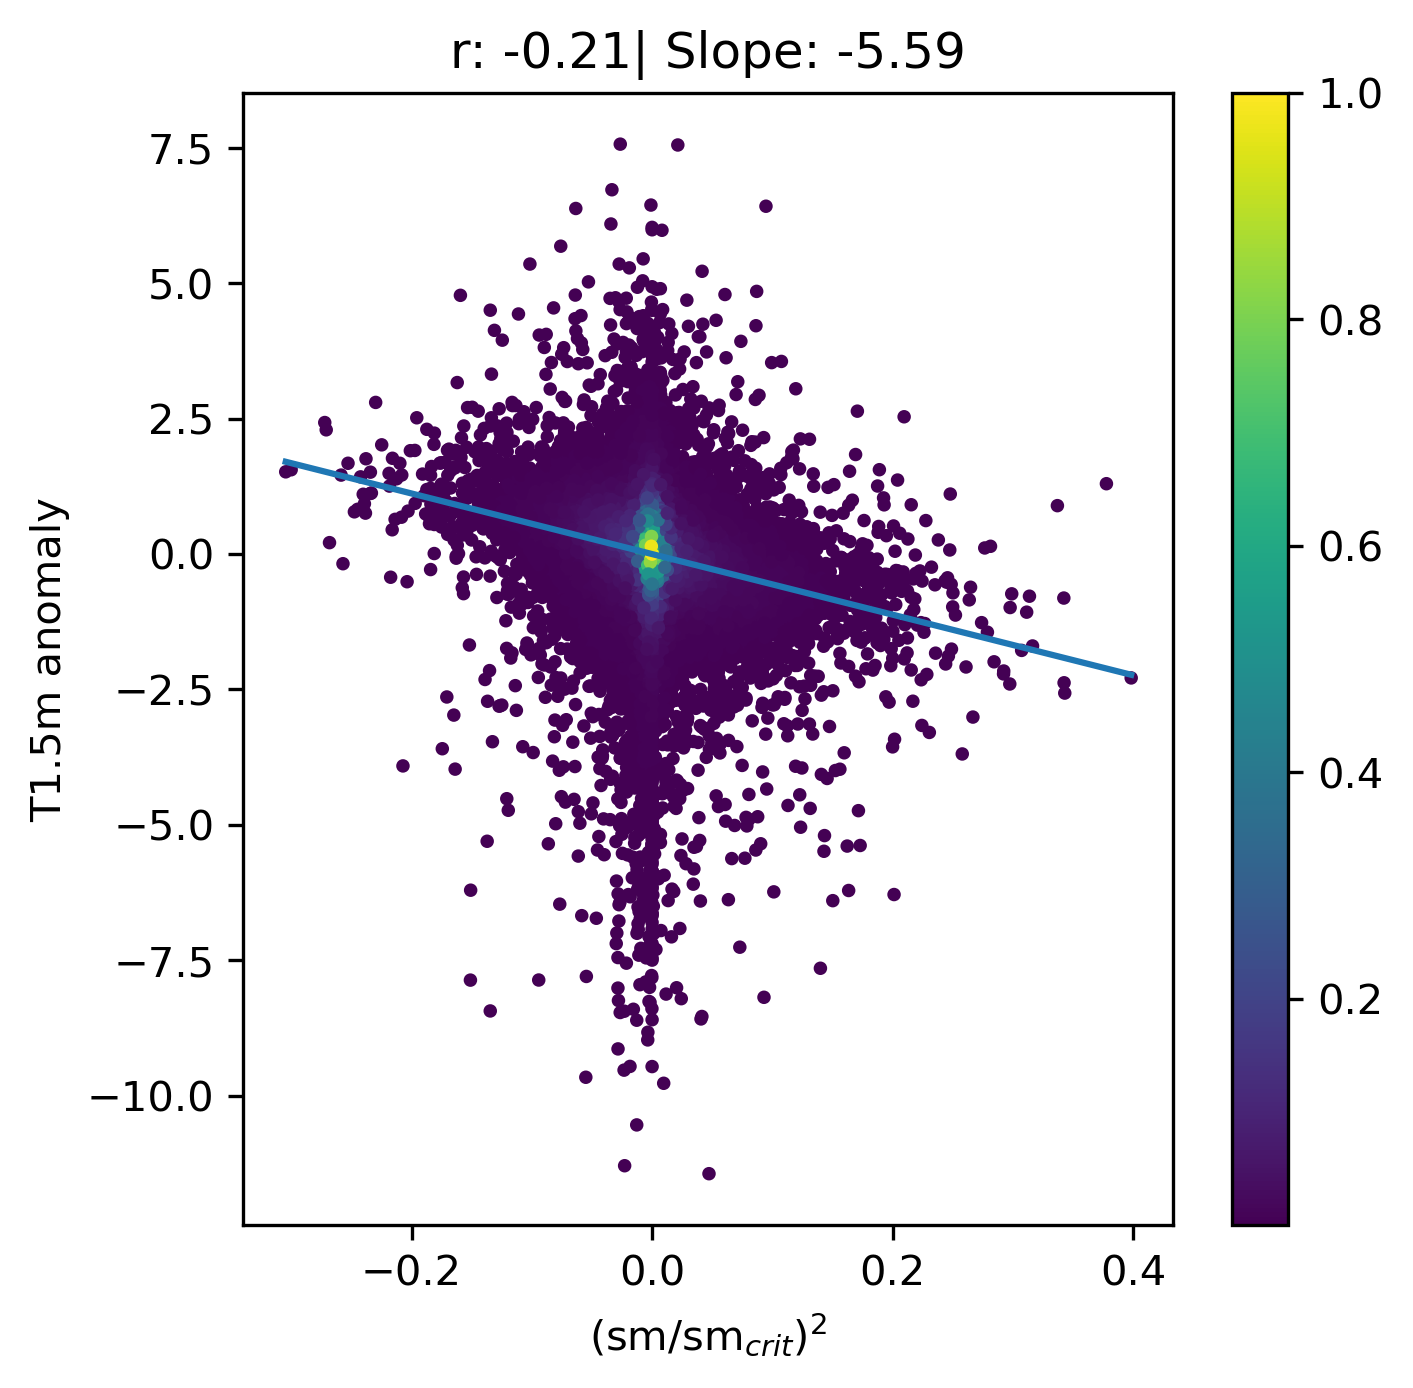

In [22]:
x = dic['sm_anom']
y = dic['t_anom']

slope, intercept, r, p, std_err = linregress(x, y)

density = calc_density(x,y)
f=plt.figure(figsize=(5,5),dpi=300)
ax = f.add_subplot(111)
plt.scatter(x,y, c=density, s=5)
#plt.plot(intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.plot(np.linspace(np.min(x), np.max(x),10), intercept+ np.linspace(np.min(x), np.max(x),10)*slope)
plt.title('r: '+str(np.round(r,2))+'| Slope: '+str(np.round(slope,2)))
plt.xlabel(r'(sm/sm$_{crit}$)$^2$')
plt.ylabel('T1.5m anomaly')
#ax.set_ylim(-4,4)
#ax.set_xlim(-0.4,0.4)
plt.colorbar()
f.savefig('/home/ck/OneDrive/data/CEH/papers/2020_SemeenaWA_Ensemble/data/scatter_nosetlim.jpg')